# <center> Procesamiento de imágenes con Python

## Temario a desarrollar:
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste
*	**Filtros: suavizado y detección de bordes.**
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones 


**Filtros: Lineales (correlación/convolución) y no lineales **

In [4]:
import cv2
import numpy as np

a=np.array([[ 1,  5,  0, 4], 
   [ 7,  2,  9, 1], 
   [ 2,  3,  4, 2],
   [ 2, 4, 1, 0]],dtype='uint8')

kernel=np.ones((3,3))
print("Matriz \n",a)
print("Máscara \n",kernel)
salida = cv2.filter2D(a, -1,kernel)#El -1 indica que la salida será del mismo tipo que a
print("Resultado= \n",salida)

cv2.imshow('r',a)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

Matriz 
 [[1 5 0 4]
 [7 2 9 1]
 [2 3 4 2]
 [2 4 1 0]]
Máscara 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Resultado= 
 [[33 42 33 42]
 [30 33 30 33]
 [29 34 26 31]
 [26 25 23 22]]


In [2]:
salida2 = cv2.filter2D(a, -1, kernel,borderType = cv2.BORDER_CONSTANT)
#Este tipo de bordertype primero rellena con ceros, luego filtra
print(salida2)


[[15 24 21 14]
 [20 33 30 20]
 [20 34 26 17]
 [11 16 14  7]]


In [3]:
salida3 = cv2.filter2D(a, -1, kernel,borderType = cv2.BORDER_REPLICATE)
#El -1 indica que la salida será del mismo tipo que a
#Este tipo de bordertype rellena a replicando las primeras fila y primeras columnas
#En la esquina pone el valor de la esquina de a (a[0][0])
print(salida3)

[[30 30 30 27]
 [30 33 30 27]
 [31 34 26 20]
 [23 23 19 10]]


## Filtros Lineales

**Filtro de la media**

Objetivo: suavizado

Ventaja: simple

Desventajas:

    Puede crear grises que no estaban en la imagen original

    Sensible a valores locales

**Aplicaciones**

- Suavizar imágenes, es decir, reducir la cantidad de
variaciones de intensidad entre píxeles vecinos.

- Conseguir que las intensidades de los objetos pequeños
se mezclen con el fondo con el fin de detectar los objetos
de mayor tamaño.

- Eliminar ruido.

In [1]:
#Con función definimos la máscara para suavisado
import numpy as np
def mascara(n):
    return(np.ones((n,n),np.float32)/(n**2))

In [2]:
masc=mascara(5)#se estila ancho (y alto) impar
print(masc)
print(np.sum(masc))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
1.0


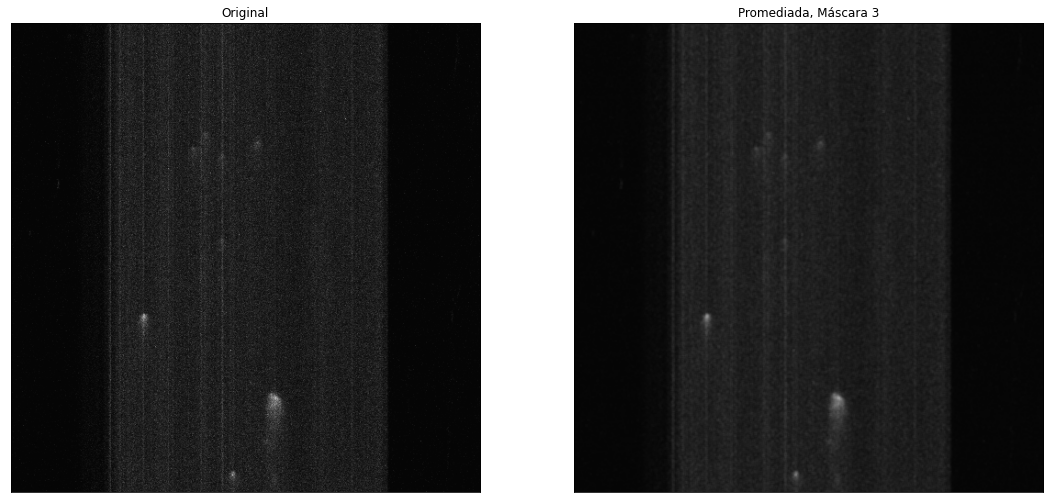

In [8]:
#Utilizo filter2D para hacer suavizado

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./imagenes/r3ac001.tif") #lee monocroma
n=3
kernel=mascara(n)

dst = cv2.filter2D(img,0,kernel)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# para fijar el tamaño de la imagen
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.show()

In [9]:
print(np.shape(img),np.shape(dst))

(512, 512, 3) (512, 512, 3)


# **Filtro Gaussiano**

Como el filtro de la media, sirve para suavizar o emborronar la imagen.

Modeliza la función gaussiana.

Los pesos en la máscara dependen de la distancia al píxel central. Mayor distancia, menor peso.


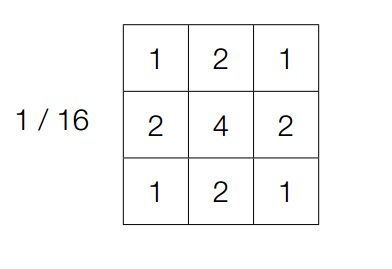

Aplicaciones

- Similar al filtro de la media o promediado:

    disminución de la nitidez,   
    aumento de borrosidad,     
    pérdida de detalles.
    
  
- Produce un suavizado más uniforme que el de la media.

Ingrese tamaño matriz para filtro gaussiano (número impar y positivo)  11


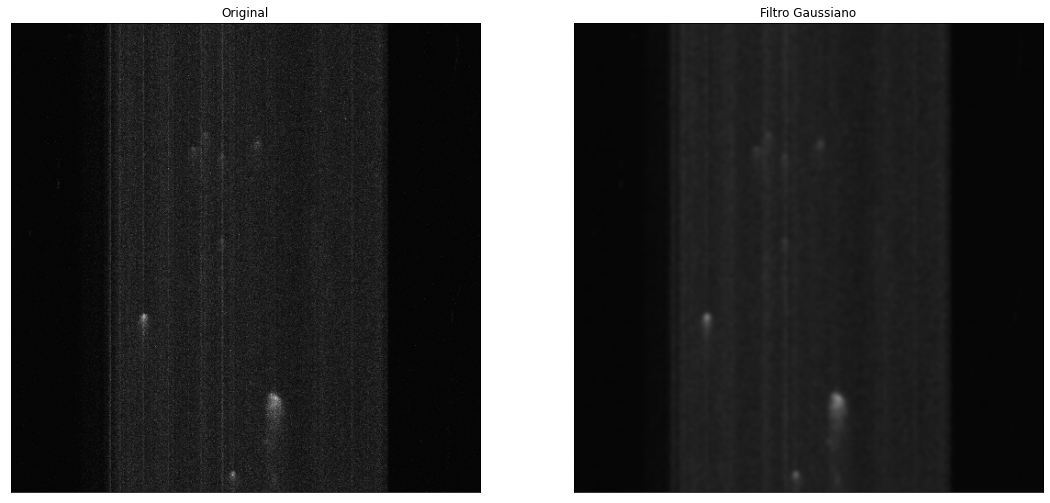

In [12]:
#Filtro gaussiano
#Opencv tiene la función
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# img = cv2.imread(path + photo_name + ".tif")#carga la imagen BGR como arreglo numpy mxnx3 uint8 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#BGR a monocroma numpy mxn uint8
cv2.imwrite('./imagenes/r3ac001.tif', gris) 
n=int(input('Ingrese tamaño matriz para filtro gaussiano (número impar y positivo) '))
#n=7

blur = cv2.GaussianBlur(gris,(n,n),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])
#print(type(blur[0] [0]))#verifica que devuelve uint8
plt.show()



## Tipos de Ruido

Ruido Gaussiano

Ruido Impulsivo

Ruido Sal y Pimienta




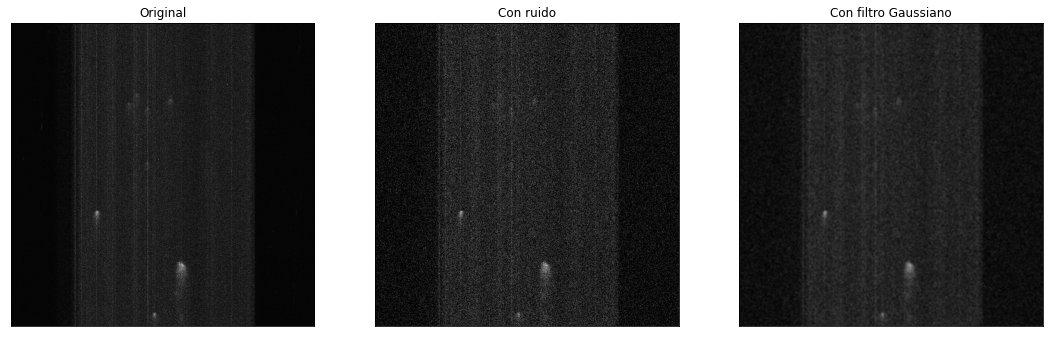

In [13]:
#Probaremos el filtro gaussiano añadiendo ruido gaussiano
#Generamos una imagen con ruido
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imagenes/r3ac001.tif')    # numpy-array of shape (N, M, 3); dtype=np.uint8
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises.

mean = 5.0   # valor medio
std = 20.0    # desviación estándar
ruido = np.random.normal(mean, std, gris.shape)

imagen_con_ruido=gris+ruido
imagen_ruidosa_recortada = np.clip(imagen_con_ruido,0,255) #para que no salga de los límites

imagenfinal=np.uint8(imagen_ruidosa_recortada)
#Aplico filtro gaussiano mascara de 5
blur = cv2.GaussianBlur(imagenfinal,(5,5),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(131),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imagenfinal,cmap='gray',vmin=0,vmax=255),plt.title('Con ruido')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Con filtro Gaussiano')
plt.xticks([]), plt.yticks([])
plt.show()


### Filtros no Lineales

- Filtro de la mediana: reemplaza los valores del bloque por su mediana (valor que deja igual cantidad de valores de intensidad superiores, como inferiores).

- Filtro del mínimo: reemplaza los valores del bloque por el mínimo (permite hallar los puntos oscuros). Elimina el ruido sal.

- Filtro del máximo: reemplaza los valores del bloque por el máximo (permite hallar los puntos brillantes). Elimina el ruido pimienta.

- Filtro de orden n: reemplaza los valores del bloque por el valor de orden n del vector formado por los elementos ordenados del bloque

- Filtro de moda: toma el valor que más se repite en el bloque en estudio. (Tiene más sentido cuando los pixeles son categóricos, parece no estar implementado en python)

Notar que son medidas estadísticas

### Filtro de la Mediana

Filtro con efecto de suavisado. Reemplaza todos los valores de intensidad de un bloque por el valor de la mediana.

Ventaja: Elimina los valores muy alejados (tipo sal y pimienta), no se ve afectado por datos atípicos


Ingrese el tamaño de la máscara (n):  5


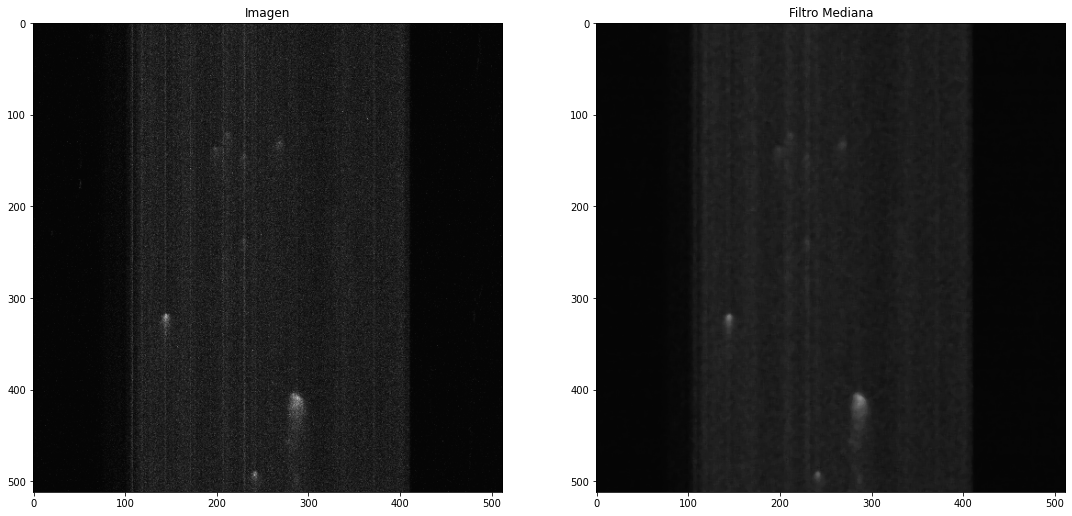

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./imagenes/r3ac001.tif")    # numpy-array of shape (N, M); dtype=np.uint8
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises

#Filtro de la mediana
n= int(input('Ingrese el tamaño de la máscara (n): '))
median = cv2.medianBlur(gris,n)#filtro de la mediana

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')
plt.subplot(122),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')
plt.show()
#Para ver el efecto agregarle ruido salt & pepper

Ingrese tamaño kernel (n), positivo impar:  3


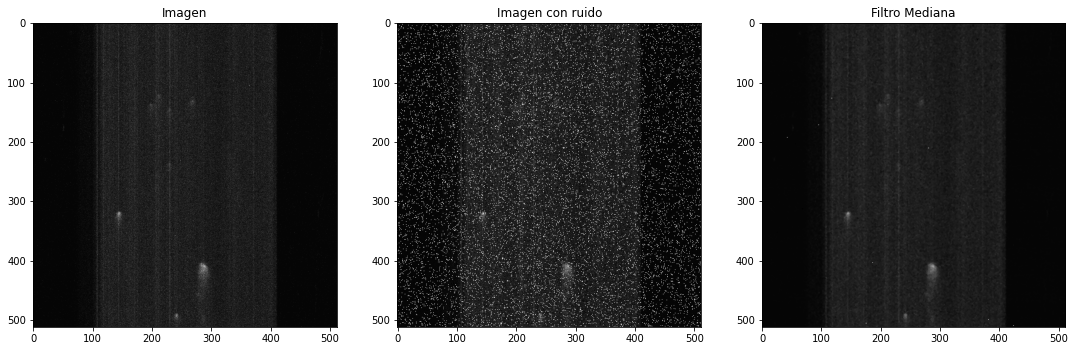

In [16]:
#Generar una imagen con ruido sal y pimienta
#Aplicar filtro de mediana
import numpy as np 
import random 
import cv2 

def sp_noise(image,prob): 
#agregar ruido salt and pepper noise a una imagen 
#prob=probabilidad del ruido 
    output = np.zeros(image.shape,np.uint8)   
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            rdn = random.random() #devuelve flotante entre 0. y 1.
            if rdn < prob: 
                output[i][j] = 0 
            elif rdn > (1-prob): 
                output[i][j] = 255 
            else: 
                output[i][j] = image[i][j] 
    return output 

image = cv2.imread("./imagenes/r3ac001.tif",0)
imagen_ruidosa = sp_noise(image,0.05) #prob=5%

cv2.imwrite('./imagenes/r3ac001_noise.jpg', imagen_ruidosa) 

n=int(input('Ingrese tamaño kernel (n), positivo impar: '))
median = cv2.medianBlur(imagen_ruidosa,n)#filtro de la mediana

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(131),plt.imshow(image,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')
plt.subplot(132),plt.imshow(imagen_ruidosa,cmap='gray',vmin=0,vmax=255),plt.title('Imagen con ruido')
plt.subplot(133),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')
plt.show()

**Ejercicio:** elija una imagen, aplíquele ruido gaussiano. Muestre las imágenes que resultan de aplicarle  distintos suavizados.